<h1><center> Barbell Graph </center> </h1>


This is the code for the Barbell Graph experiment described in figure 3 of the paper.


## I. Create the graph and visualize

(Unfortunately, the nx.draw(G) does not yield a very clean picture, but we basically have two cliques of densely connected nodes, linked by a chain)

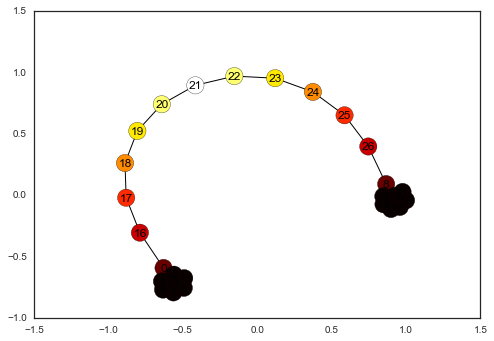

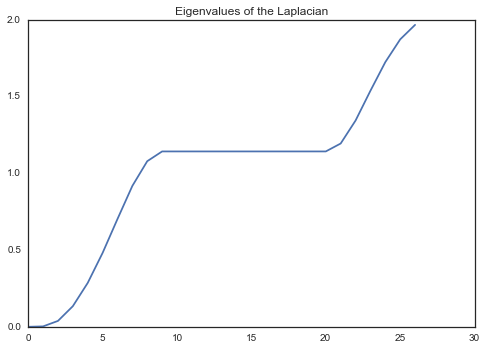

In [1]:
%matplotlib inline
#### Tests like paper
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np
import pandas as pd
import pickle
import seaborn as sb
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import sys

sys.path.append('../')
import graphwave as gw
from shapes.shapes import *
from distances.distances_signature import *
from characteristic_functions import *



name_graph='barbell'
sb.set_style('white')
G , colors = barbel_graph(0, 8, 5,plot=True)
N=nx.number_of_nodes(G)
Gg = pygsp.graphs.Graph(nx.adjacency_matrix(G))
Gg.create_laplacian("normalized")
Gg.lap_type="normalized"
Gg.compute_fourier_basis(force_recompute=True)
eigenvec=Gg.e
plt.figure()
plt.plot(eigenvec)
plt.title('Eigenvalues of the Laplacian')

In [3]:
from graphwave import graphwave_alg
chi,heat_print, taus = graphwave_alg(G, np.linspace(0,100,25), taus=range(19,21), verbose=True)

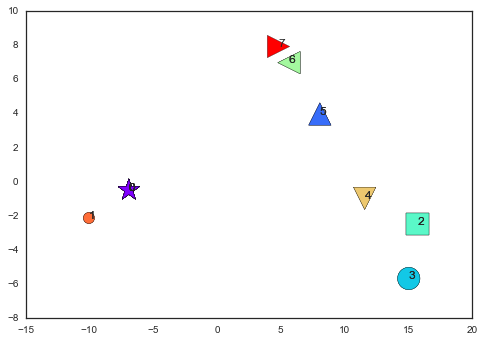

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
nb_clust=len(np.unique(colors))
pca=PCA(n_components=5)
trans_data=pca.fit_transform(StandardScaler().fit_transform(chi))
km=sk.cluster.KMeans(n_clusters=nb_clust)
km.fit(trans_data)
labels_pred=km.labels_
######## Params for plotting
cmapx=plt.get_cmap('rainbow')
x=np.linspace(0,1,np.max(labels_pred)+1)
col=[cmapx(xx) for xx in x ]
markers = {0:'*',1: '.', 2:',',3: 'o',4: 'v',5: '^',6: '<',7: '>',8: 3 ,9:'d',10: '+',11:'x',12:'D',13: '|',14: '_',15:4,16:0,17:1,18:2,19:6,20:7}
########

for c in np.unique(colors):
        indc=[i for i,x in enumerate(colors) if x==c]
        #print indc
        plt.scatter(trans_data[indc,0], trans_data[indc,1],c=np.array(col)[list(np.array(labels_pred)[indc])] ,marker=markers[c%len(markers)],s=500)
labels = colors
for label,c, x, y in zip(labels,labels_pred, trans_data[:, 0], trans_data[:, 1]):
            plt.annotate(label,xy=(x, y), xytext=(0, 0), textcoords='offset points')
  